In [ ]:
#REGRESSION_LINEARE

In [121]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
x,y=make_regression(n_samples=100, n_features=1,noise=10)
print(y.shape)
y = y.reshape(y.shape[0], 1)
y.shape
X=np.hstack((np.ones(x.shape),x))
plt.scatter(x,y)

plt.plot(x,h(X,w),c='r')
w=np.random.rand(2,1)
def h(X,w):
    return X.dot(w)n  
def loss(X,w,y):
    return (1/2*len(y))*np.sum((h(X,w)-y)**2)
def gradient(X,w,y):
    return X.T.dot((h(X,w)-y))*(1/len(y))
def gradient_descent(X,y,w,alpha,n):
    for i in range(0,n):
        w=w-alpha*gradient(X,y,w)
    return w
w_jadida=gradient_descent(X,y,w,alpha=0.01,n=10000)
w_jadida
y_hat=h(X,w_jadida)
plt.scatter(x,y)
plt.plot(x,y_hat,c='r')

### logistique

In [ ]:
from sklearn.datasets import make_classification
x, y = make_classification(n_samples=100, n_features=1, n_informative=1, n_redundant=0,n_clusters_per_class=1, random_state=42)
x.shape
y.shape
y=y.reshape(y.shape[0],1)
plt.scatter(x,y)
w=np.random.rand(2,1)
X=np.hstack((np.ones(x.shape),x))
z=X.dot(w)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
def loss(X, z, y):
    return -np.mean(y * np.log(sigmoid(z)) + (1 - y) * np.log(1 - sigmoid(z)))
def gradient(X, z, y):
    return X.T.dot(sigmoid(z) - y) / len(y)
def gradient_descent(X, z,w,y, alpha, n_iterations):
    for i in range(n_iterations):
        grad = gradient(X, z, y)
        w -= alpha * grad
    return w
w_jdida=gradient_descent(X, z,w, y, 0.001, 1000)
w_jdida
z=X.dot(w_jdida)
y_dyalna=sigmoid(z)
y_dyalna=np.round(y_dyalna)
plt.scatter(x,y)
plt.plot(x,y_dyalna,color='r')
acc=np.sum(y_dyalna==y)/len(y_dyalna)
acc

In [ ]:
#KNN

In [ ]:
import numpy as np
from collections import Counter
def euclidean_distance(x1,x2):
    distance=np.sqrt(np.sum(x1-x2)**2)
    return distance
class KNN:
    def __init__(self,k=3):
        self.k=k
    def fit(X,y):
        self.X_train=X
        self.y_train=y
    def predict(self,X):
        prediction=[self.predict(x) for x in X]
        return prediction 
    
    def predict(self,x):
        distances=[euclidean_distance(x,x_train) for x_train in self.X_train ]
        k_indice=np.argsort(distances)[:,self.k]
        lv=[self.y_train[i] for i in k_indice]
        mc=Counter(lv).most_commun
        return mc[0][0]
    

In [ ]:
#ANN

In [65]:
import numpy as np
import matplotlib.pyplot  as plt
from sklearn.datasets import make_blobs
x,y=make_blobs(n_samples=100,n_features=2,centers=2,random_state=0)
x.shape
y.shape
y=y.reshape(y.shape[0],1)
y.shape
plt.scatter(x[:,0], x[:, 1], c=y, cmap='summer')
plt.colorbar() 
plt.show()
def initialisation(x):
    w=np.random.randn(x.shape[1],1)
    b=np.random.randn(1)
    return (w,b)
def model(x,w,b):
    z=x.dot(w)+b
    A=1/(1+np.exp(-z))
    return A
def loss_function(A,y):
    return -1/len(y)*np.sum(y*np.log(A)+(1-y)*np.log(1-A))
def gradient(A,x,y):
    dw=1/len(y)*np.dot(x.T,(A-y))
    db=1/len(y)*np.sum(A-y)
    return (dw,db)
def updates(w,b,dw,db,alpha):
    w=w-alpha*dw
    b=b-alpha*db
    return (w,b)
def predict(x,w,b):
    A=model(x,w,b)
    return A>=0.5
from sklearn.metrics import accuracy_score
def artificial_neuron(x,y,alpha=0.01,n_iter=1000):
    loss=[] 
    w,b=initialisation(x)
    for i in range(n_iter):
      
        A=model(x,w,b)
        loss.append(loss_function(A,y))
        dw,db=gradient(A,x,y)
        w,b=updates(w,b,dw,db,alpha)
    y_pred=predict(x,w,b)
    print(accuracy_score(y,y_pred))
    plt.plot(loss)
    return (w,b)
w,b=artificial_neuron(x,y)
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X[:,0], X[:, 1], c=y, cmap='summer')

x1 = np.linspace(-1, 4, 100)
x2 = ( - w[0] * x1 - b) / w[1]

ax.plot(x1, x2, c='orange', lw=3)

In [66]:
##ANN_TENSORFLOW 

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
fashiondata=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=fashiondata.load_data()
x_train.shape
x_test.shape
x_train,x_test=x_train/255,x_test/255
model=tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(128,activation="relu"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10,activation="softmax")
    
])
model.compile(
              optimizer="adam",
              loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5)
model.evaluate(x_test,y_test)

In [ ]:
from sklearn.neural_network import MLPClassifier
#Créer une instance de MLPClassifier pour ce prolème de classification
mlp=MLPClassifier(hidden_layer_sizes=(1),max_iter=100,learning_rate_init=0.1,verbose=1, activation='logistic')
#Entrainer ce modèle sur les données d'entrainement
mlp.fit(x,y)
#Tester ce modèle avec les données de teste
from sklearn.metrics import classification_report
y_pred=mlp.predict(x)
print(classification_report(y,y_pred))
from sklearn.metrics import confusion_matrix
confusion_matrix(y,y_pred)
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()
from matplotlib import pyplot
for i in range(9):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [ ]:
#CNN

In [ ]:
import tensorflow as tf
from tensorflow import keras
fashiondata=tf.keras.datasets.mnist
(xxx_train,yyy_train),(xxx_test,yyy_test)=fashiondata.load_data()
xxx_train=xxx_train.reshape(-1,28,28,1)
xxx_test=xxx_test.reshape(-1,28,28,1)
xxx_train,xxx_test=xxx_train/255,xxx_test/255
model=tf.keras.models.Sequential([
    tf.keras.layers.Input((28,28,1)),
    tf.keras.layers.Conv2D(8,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(16,(3,3),activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10,activation="softmax")
    
])
model.summary()
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])
#ENTRAINEMENT
hist=model.fit(xxx_train,yyy_train,batch_size=512,verbose=1,epochs=10,validation_data=(xxx_test,yyy_test))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(xxx_train[i],cmap=plt.get_cmap('gray'))
    plt.show()

In [ ]:
#K_MEANS

C:\Users\lenovo\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


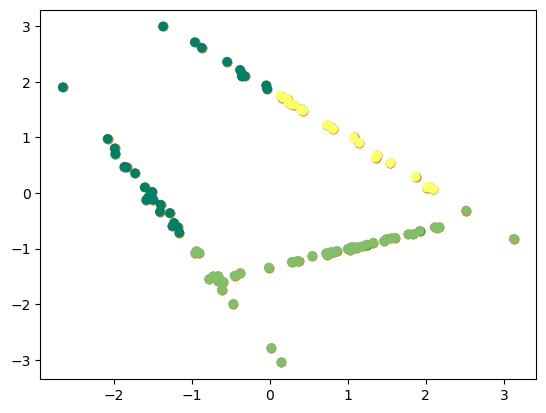

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
x,y=make_classification(n_samples=100,n_features=2,n_informative=2,n_redundant=0,n_clusters_per_class=1,n_repeated=0,n_classes=3)
plt.scatter(x[:,0],x[:,1])
k=3
m=x.shape[0]
index=np.random.choice(range(m),size=k)
index
centroides=x[index]
centroides
plt.scatter(x[:,0],x[:,1])
plt.scatter(centroides[:,0],centroides[:,1])

def distance(x,y):
    return np.sqrt(np.sum((x-y)**2))
yy=np.zeros((m,1))
yy
data=np.hstack((x,yy))
data.shape
dist=np.array([distance(data[:,:2],centroides[i]) for i in range (k)]).T
yy=np.argmin(data,axis=1)
plt.scatter(x[:,0],x[:,1],c=yy,cmap='summer')